<a href="https://colab.research.google.com/github/NileshD23/Seurat/blob/main/ndomah_assn6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scRNA-seq Analysis Using Seurat
## Nilesh Domah

## Setup the Seurat Object

In [73]:
# install necessary packages
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
install.packages("Seurat")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [75]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [76]:
library(dplyr)

In [77]:
library(Seurat)

In [78]:
library(patchwork)

In [79]:
# import matrix
pbmc.data <- Read10X("/content/sample1/filtered_feature_bc_matrix")

In [80]:
pbmc <- CreateSeuratObject(counts = sample1, project = "sample1")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [81]:
pbmc

An object of class Seurat 
60483 features across 2935 samples within 1 assay 
Active assay: RNA (60483 features, 0 variable features)

## Standard Pre-Processing Workflow

### QC and Selecting Cells for Further Analysis

In [82]:
# stash QC stats
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

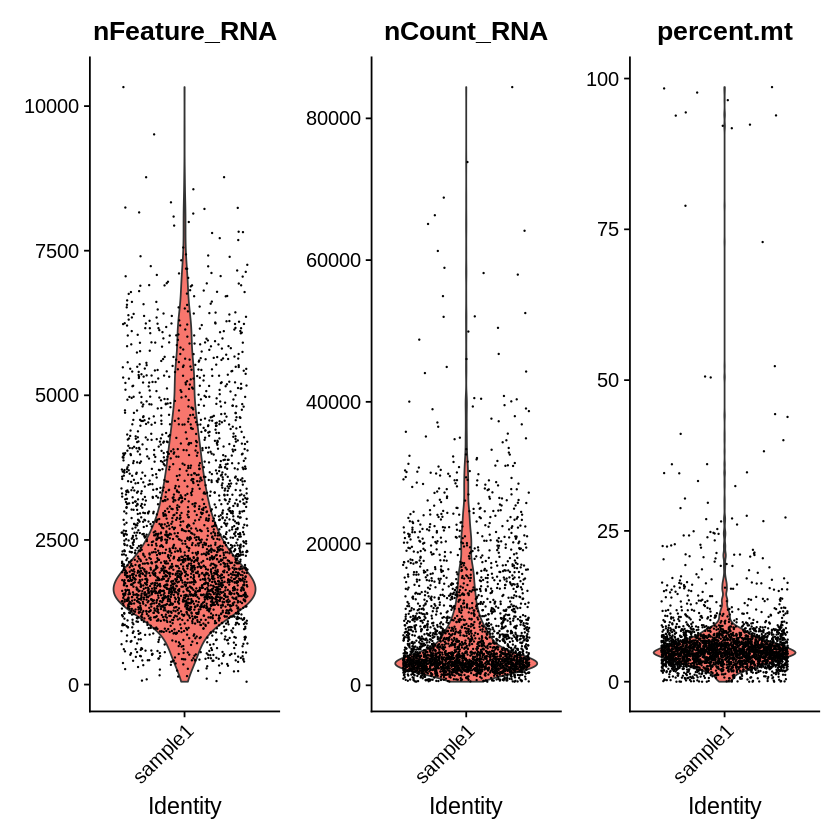

In [83]:
# visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)

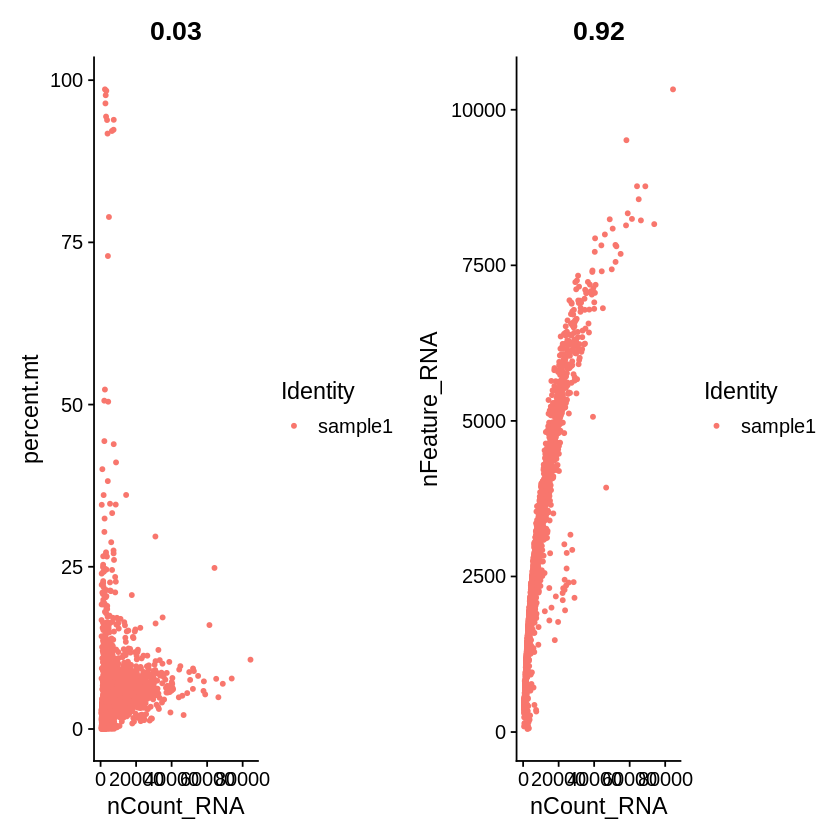

In [84]:
# use FeatureScatter to visualize feature-feature relationships

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [85]:
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

## Normalizing the data

In [86]:
pbmc <- SCTransform(pbmc)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 15019 by 968

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 968 cells



  |======================================================================| 100%


Found 90 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 15019 genes



  |======================================================================| 100%


Computing corrected count matrix for 15019 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 22.69371 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



## Identification of Highly Variable Features (Feature Selection)

When using repel, set xnudge and ynudge to 0 for optimal results



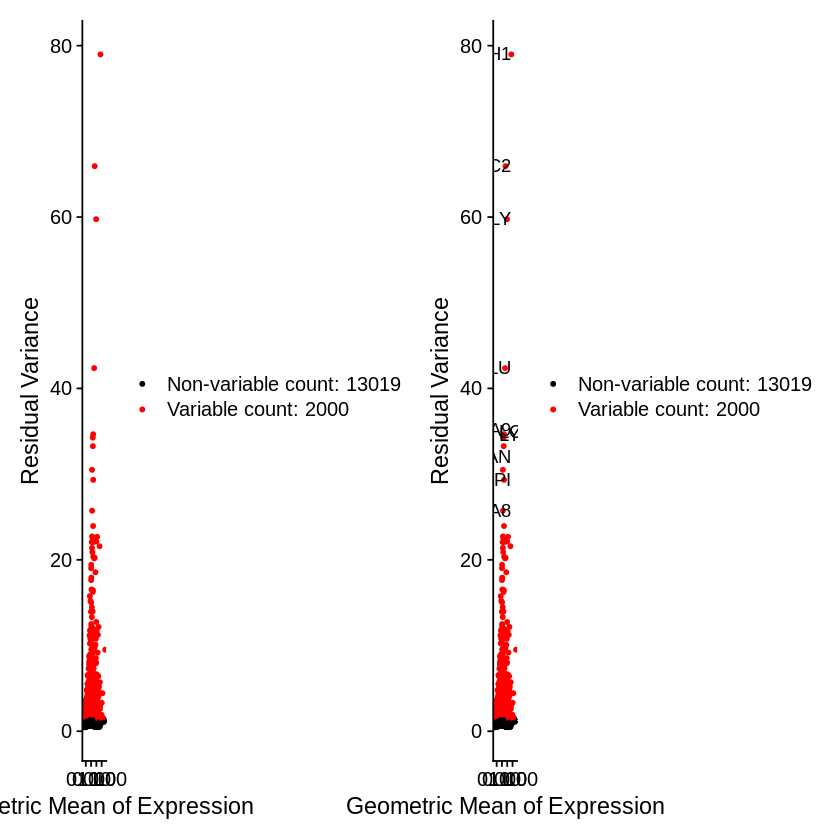

In [87]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc), 10)

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

## Scaling the data

In [88]:
all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



## Perform Linear Dimensional Reduction

In [89]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

PC_ 1 
Positive:  VCAN, SLC11A1, PLXDC2, DOCK4, RAB31, KYNU, LYZ, PLAUR, S100A9, WDFY3 
	   SERPINA1, CD93, FMN1, ANPEP, CD300E, VEGFA, TREM1, IRAK3, C10orf11, TIMP1 
	   S100A8, SLC25A37, FPR1, SPI1, AQP9, SLC8A1, FCN1, EMR2, RBM47, NCF2 
Negative:  PARP8, SKAP1, TRBC2, TRAC, FYN, CBLB, PRKCH, CD69, IL32, ARHGAP15 
	   PDE3B, SYTL3, STAT4, CCL5, PTPRC, CD247, PTPN22, CD7, PPP1R16B, FAM129A 
	   MALAT1, ITK, CD3D, FOXO1, CD52, ZBTB20, CNOT6L, RHOH, CAMK4, MBNL1 
PC_ 2 
Positive:  WFDC2, MDK, CLU, CD24, EPHX1, TACSTD2, SLPI, DEFB1, SCGB2A1, LCN2 
	   KRT18, PIGR, SELENBP1, DUSP23, HP, CNN3, RAB25, EPCAM, SOX17, MSX1 
	   ELF3, SFN, KRT8, IFI27, PPAP2C, KRT19, SAA1, FTH1, PHLDA3, CRIP2 
Negative:  MALAT1, SRGN, MT-CO1, PTPRC, MBNL1, MT-ND3, CELF2, NEAT1, SIPA1L1, MT-ATP6 
	   STK17B, ATXN1, SAMSN1, MT-CO3, DPYD, MT-CO2, FKBP5, FYN, ARHGAP15, DUSP1 
	   LINC-PINT, TNFAIP3, MT-CYB, SYTL3, ZEB2, PRKCH, FOXP1, CMIP, JARID2, CBLB 
PC_ 3 
Positive:  ATP8B4, KLRC1, MCTP2, RP11-277P12.20, CTSW, 

In [90]:
# Examine and visualize PCA results a few different ways
print(pbmc[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  VCAN, SLC11A1, PLXDC2, DOCK4, RAB31 
Negative:  PARP8, SKAP1, TRBC2, TRAC, FYN 
PC_ 2 
Positive:  WFDC2, MDK, CLU, CD24, EPHX1 
Negative:  MALAT1, SRGN, MT-CO1, PTPRC, MBNL1 
PC_ 3 
Positive:  ATP8B4, KLRC1, MCTP2, RP11-277P12.20, CTSW 
Negative:  CD27, ARID5B, IL7R, POU2AF1, LTB 
PC_ 4 
Positive:  TMSB10, LDLRAD4, ACTB, CD3D, SPOCK2 
Negative:  DERL3, MZB1, IGJ, POU2AF1, ANKRD36BP2 
PC_ 5 
Positive:  GZMK, TC2N, GZMH, CCL4, ANK3 
Negative:  TNFRSF18, ICA1, TBC1D4, STAM, CTLA4 


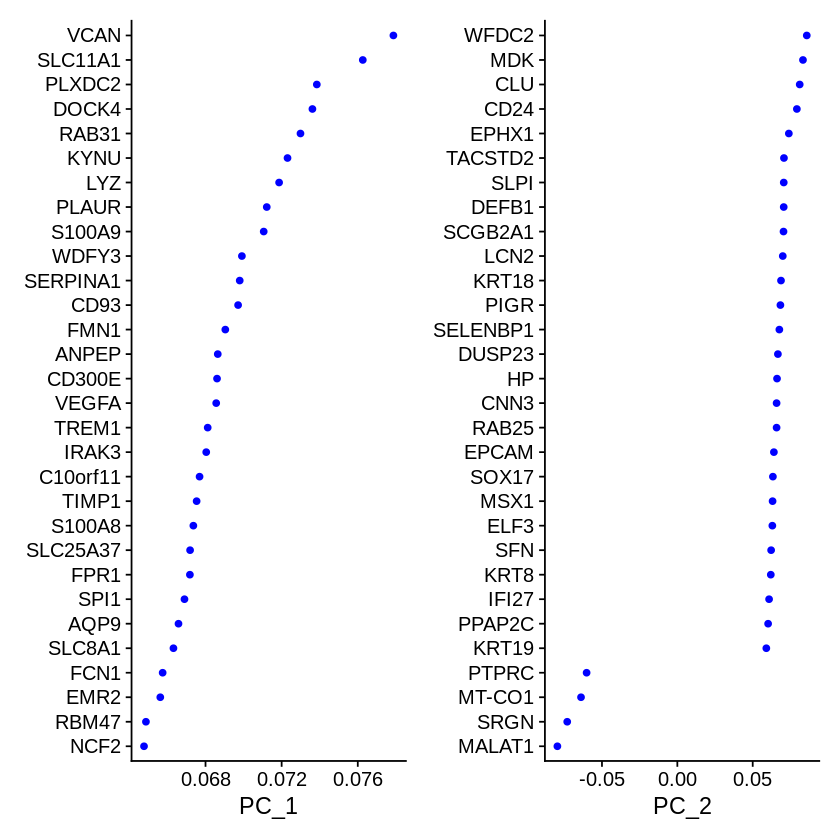

In [91]:
VizDimLoadings(pbmc, dims = 1:2, reduction = "pca")

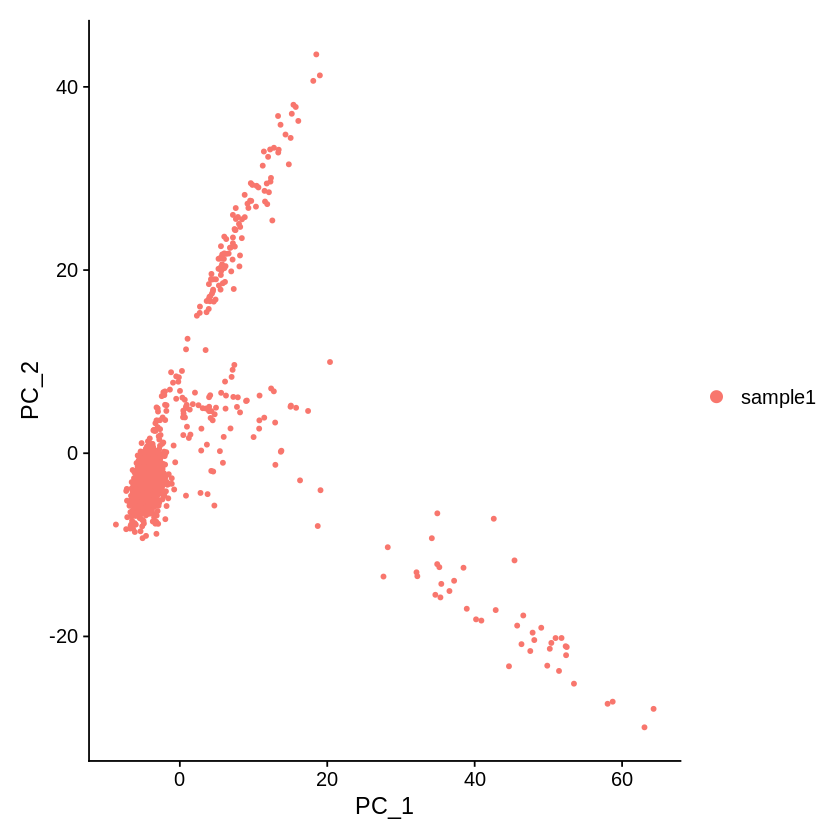

In [92]:
DimPlot(pbmc, reduction = "pca")

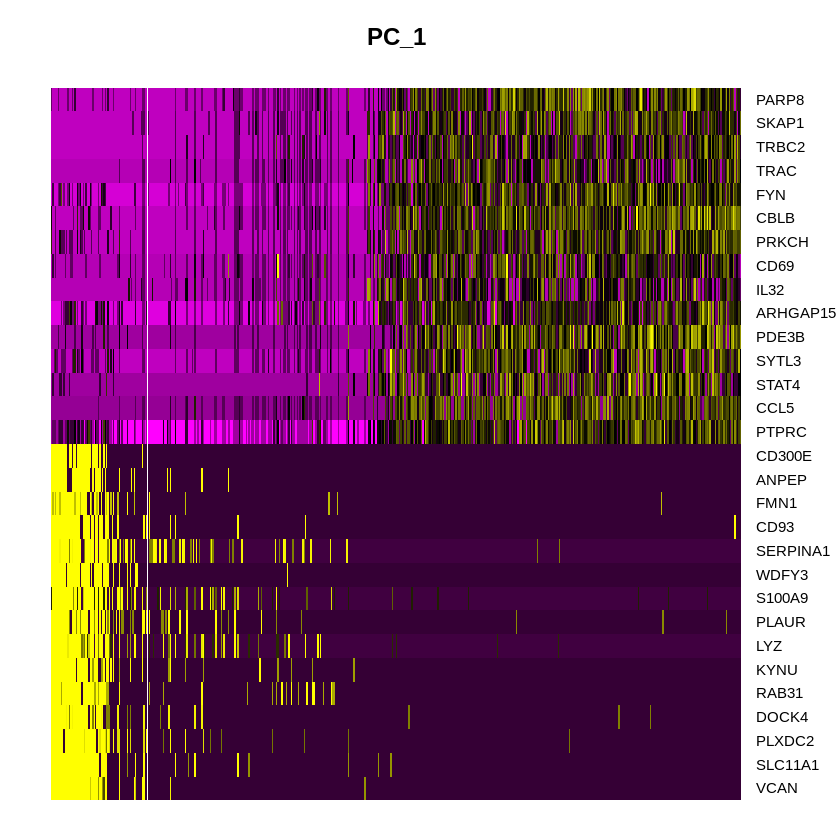

In [93]:
DimHeatmap(pbmc, dims = 1, cells = 500, balanced = TRUE)

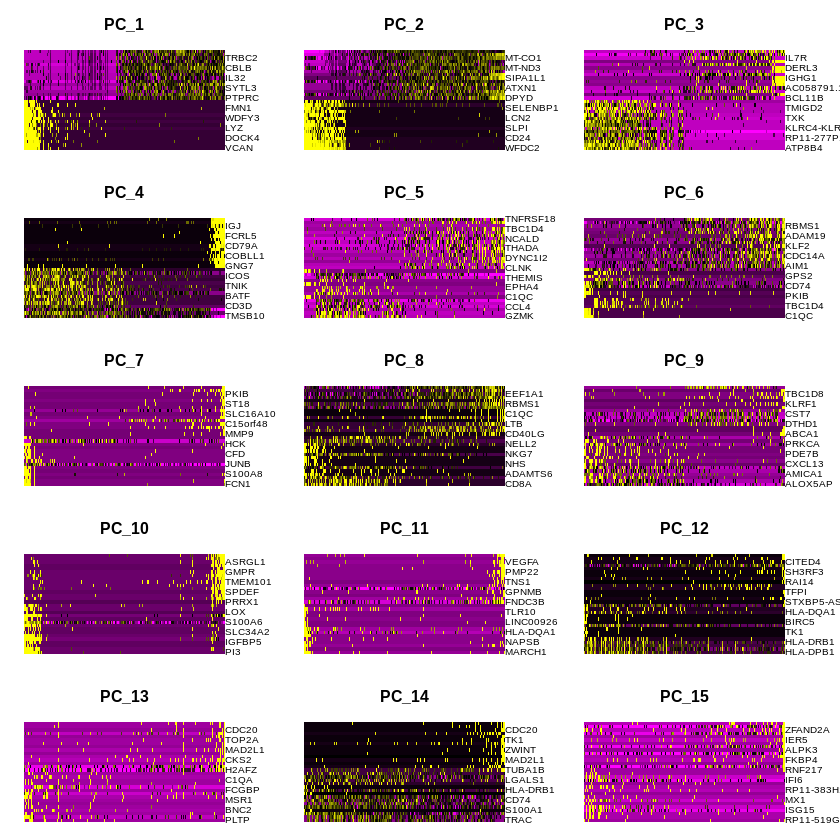

In [94]:
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

## Cluster the Cells


In [95]:
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 968
Number of edges: 25799

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9068
Number of communities: 10
Elapsed time: 0 seconds


In [96]:
# Look at cluster IDs of the first 5 cells
head(Idents(pbmc), 5)

AAACCCAAGGATTTAG-1 AAACCCAAGGCACCAA-1 AAACCCAGTAGTACGG-1 AAACGAAGTAGCGAGT-1 
                 0                  3                  4                  3 
AAAGGATGTCGCACGT-1 
                 1 
Levels: 0 1 2 3 4 5 6 7 8 9

## Determine the 'dimensionality' of the dataset

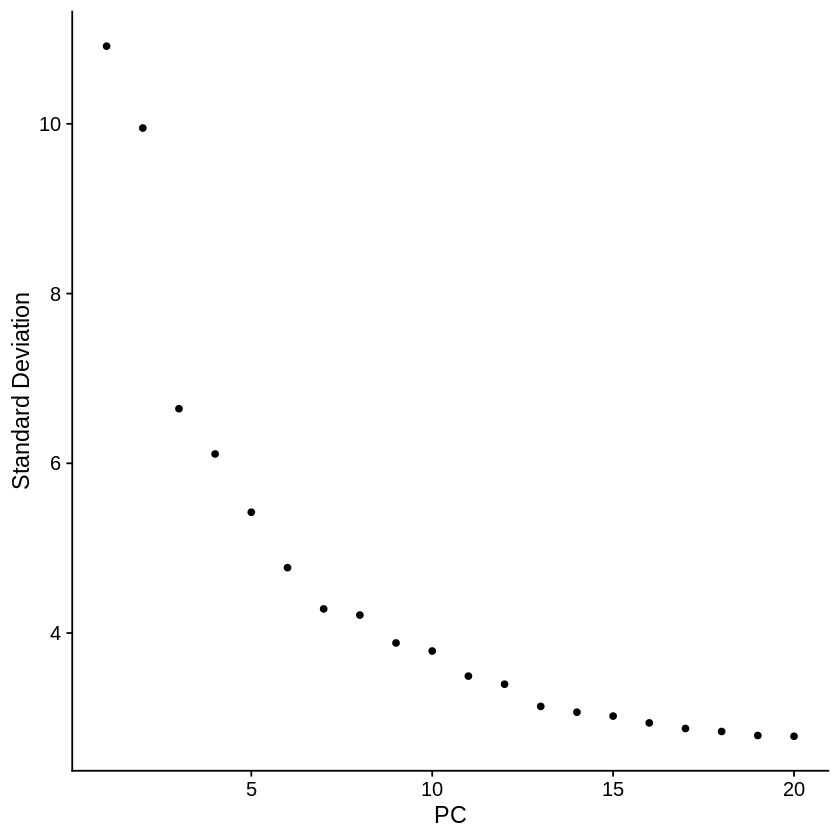

In [97]:
ElbowPlot(pbmc)

## Run non-linear dimensional reduction (UMAP/tSNE)

In [98]:
pbmc <- RunUMAP(pbmc, dims = 1:10)

22:53:19 UMAP embedding parameters a = 0.9922 b = 1.112

22:53:19 Read 968 rows and found 10 numeric columns

22:53:19 Using Annoy for neighbor search, n_neighbors = 30

22:53:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:53:19 Writing NN index file to temp file /tmp/Rtmpl1Xvph/file3d510dbc83

22:53:19 Searching Annoy index using 1 thread, search_k = 3000

22:53:20 Annoy recall = 100%

22:53:20 Commencing smooth kNN distance calibration using 1 thread

22:53:21 Initializing from normalized Laplacian + noise

22:53:21 Commencing optimization for 500 epochs, with 35678 positive edges

22:53:23 Optimization finished



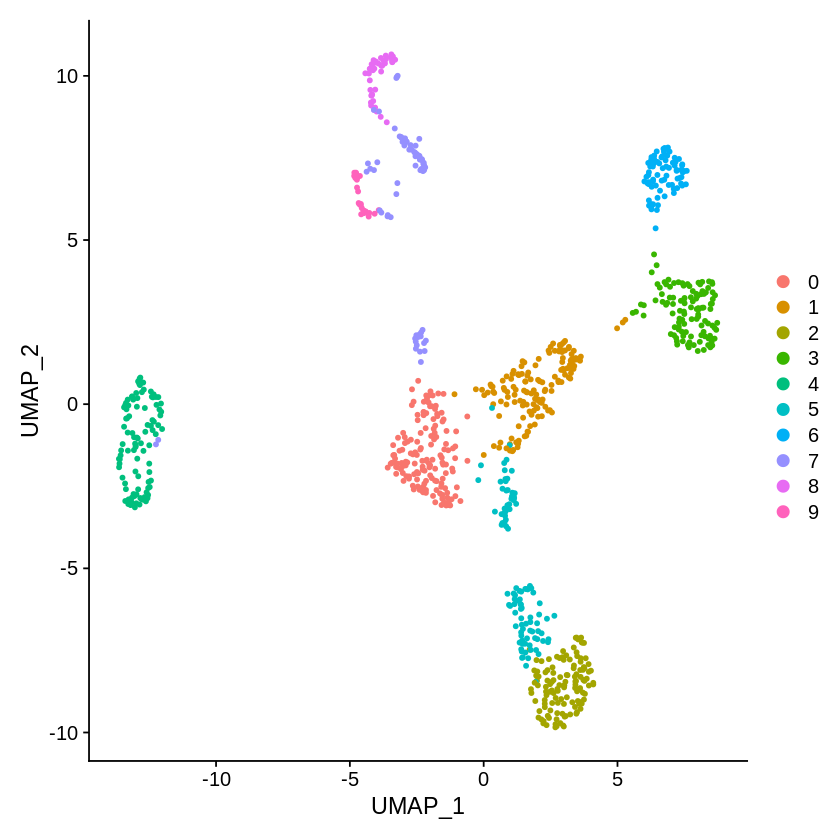

In [99]:
DimPlot(pbmc, reduction = "umap")

## Finding Differentially Expressed Features (Cluster Biomarkers)

In [100]:
# find all markers of cluster 1
cluster1.markers <- FindMarkers(pbmc, ident.1 = 2, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PPP1R9A,7.529826e-97,1.076877,0.603,0.019,1.130905e-92
GPR97,6.956068e-92,1.106690,0.675,0.039,1.044732e-87
RPS6KA2,1.847318e-90,1.416901,0.714,0.056,2.774487e-86
ATP8B4,3.731814e-88,1.926444,0.976,0.183,5.604811e-84
ZBTB16,3.971875e-83,1.810606,0.921,0.175,5.965360e-79


In [101]:
# find all markers distinguishing cluster 1 from clusters 0 and 4
cluster1.markers <- FindMarkers(pbmc, ident.1 = 1, ident.2 = c(0, 4), min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
IL7R,5.323271e-63,2.919866,0.940,0.109,7.995021e-59
RORA,1.954948e-55,2.246286,0.906,0.175,2.936136e-51
S100A4,2.898538e-49,2.189521,0.980,0.510,4.353315e-45
RUNX2,1.443274e-41,1.329691,0.752,0.101,2.167654e-37
CD226,9.953003e-41,1.206907,0.611,0.019,1.494842e-36


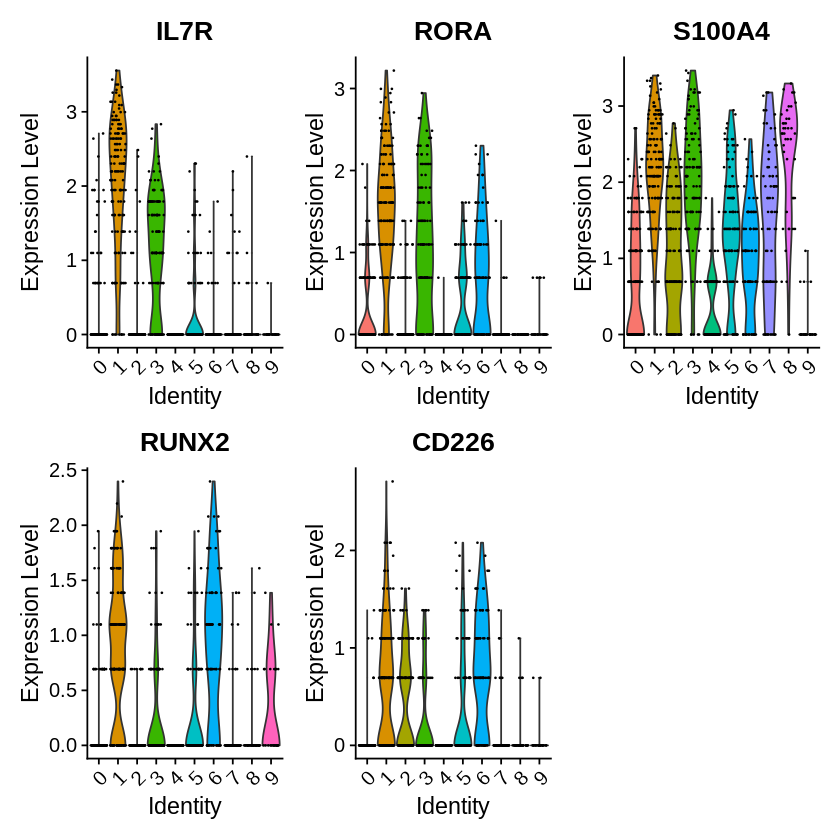

In [102]:
VlnPlot(pbmc, features = c("IL7R", "RORA", "S100A4", "RUNX2", "CD226"))

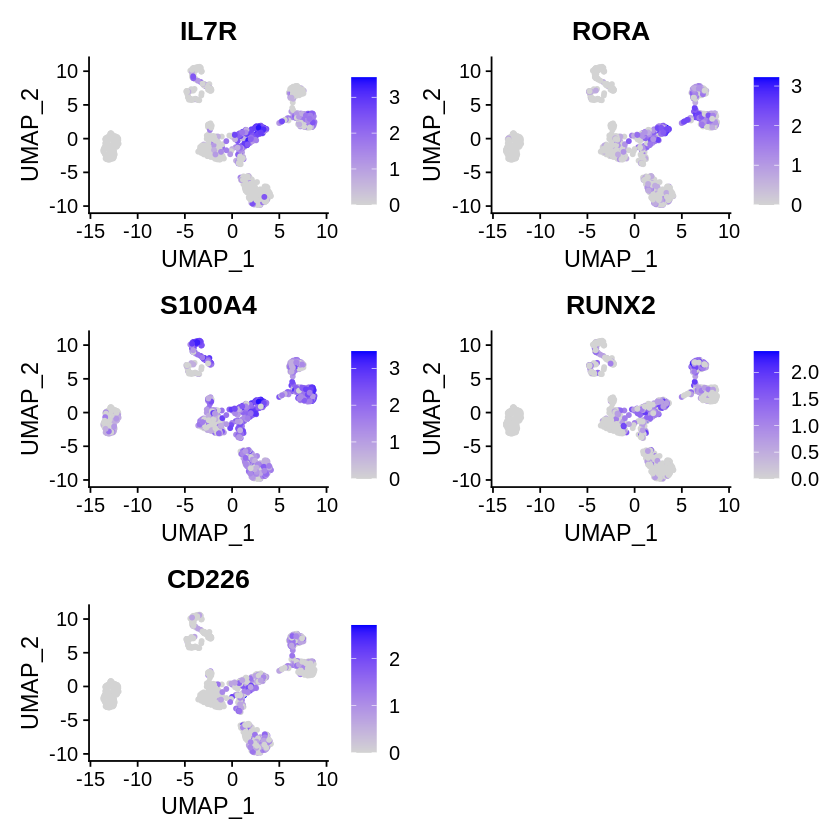

In [103]:
FeaturePlot(pbmc, features = c("IL7R", "RORA", "S100A4", "RUNX2", "CD226"))

# Extra Credit
## same analysis as above, but with sample 2

## Setup the Seurat Object

In [104]:
# import matrix
pbmc2.data <- Read10X("/content/sample2/filtered_feature_bc_matrix")

In [105]:
pbmc2 <- CreateSeuratObject(counts = sample1, project = "sample2")

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [106]:
pbmc2

An object of class Seurat 
60483 features across 2935 samples within 1 assay 
Active assay: RNA (60483 features, 0 variable features)

## Standard Pre-Processing Workflow

### QC and Selecting Cells for Further Analysis

In [107]:
# stash QC stats
pbmc2[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

Warning message:
“Removed 1967 rows containing non-finite values (stat_ydensity).”
Warning message:
“Removed 1967 rows containing missing values (geom_point).”


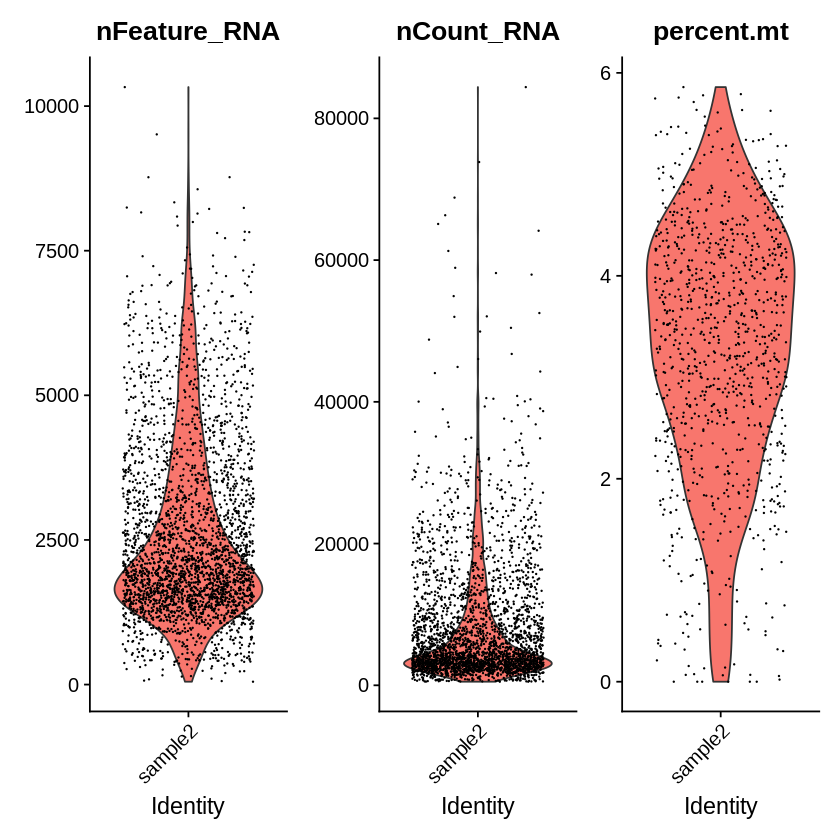

In [108]:
# visualize QC metrics as a violin plot
VlnPlot(pbmc2, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol=3)

Warning message:
“Removed 1967 rows containing missing values (geom_point).”


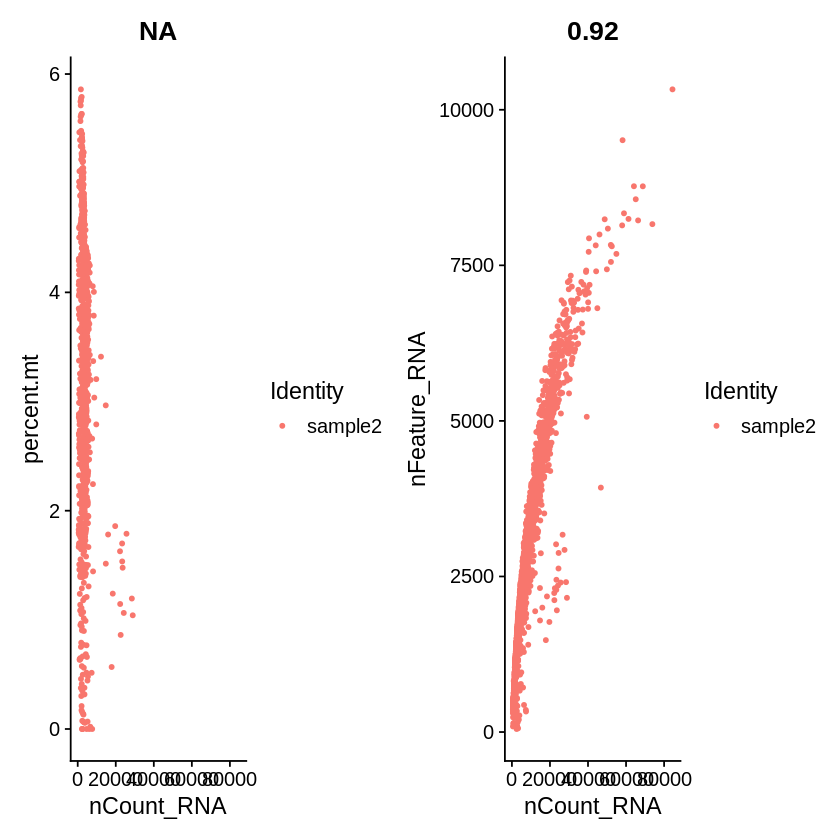

In [109]:
# use FeatureScatter to visualize feature-feature relationships

plot1e <- FeatureScatter(pbmc2, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2e <- FeatureScatter(pbmc2, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1e + plot2e

In [110]:
pbmc2 <- subset(pbmc2, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

## Normalizing the Data

In [111]:
pbmc2 <- SCTransform(pbmc2)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 14881 by 912

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 912 cells



  |======================================================================| 100%


Found 67 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 14881 genes



  |======================================================================| 100%


Computing corrected count matrix for 14881 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 21.16723 secs

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



## Identification of Highly Variable Features (Feature Selection)

When using repel, set xnudge and ynudge to 0 for optimal results



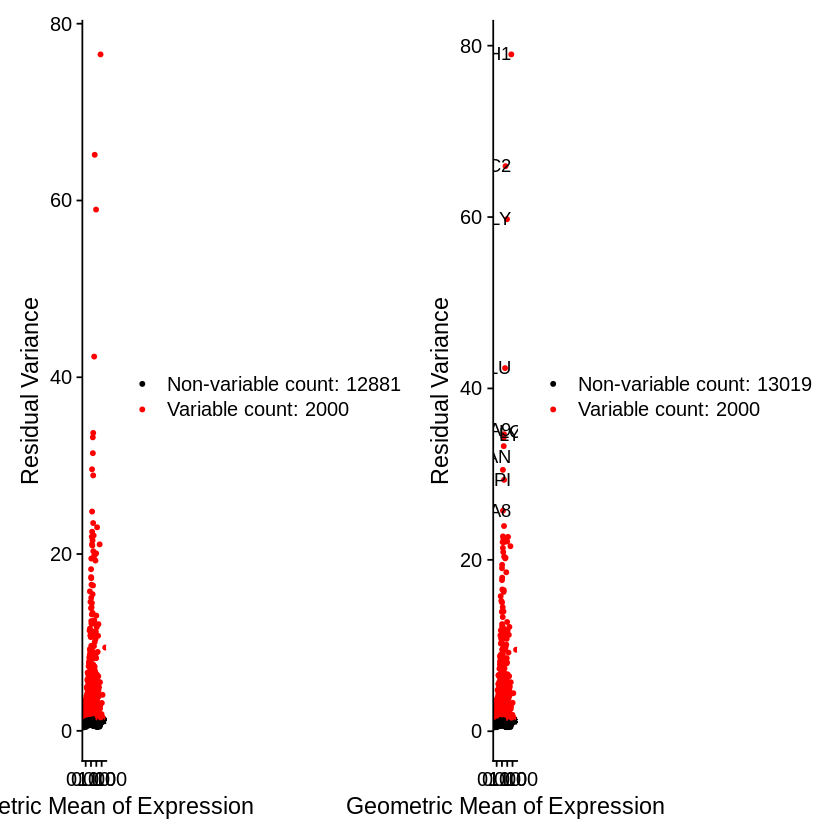

In [112]:
pbmc2 <- FindVariableFeatures(pbmc2, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(pbmc2), 10)

# plot variable features with and without labels
plot1e <- VariableFeaturePlot(pbmc2)
plot2e <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1e + plot2e

## Scaling the Data

In [113]:
all.genes <- rownames(pbmc2)
pbmc2 <- ScaleData(pbmc2, features = all.genes)

Centering and scaling data matrix



## Perform Linear Dimensional Reduction

In [114]:
pbmc2 <- RunPCA(pbmc2, features = VariableFeatures(object = pbmc2))

PC_ 1 
Positive:  VCAN, SLC11A1, PLXDC2, DOCK4, RAB31, KYNU, LYZ, PLAUR, S100A9, WDFY3 
	   SERPINA1, CD93, ANPEP, FMN1, C10orf11, CD300E, VEGFA, IRAK3, TREM1, TIMP1 
	   S100A8, SPI1, SLC25A37, FPR1, AQP9, SLC8A1, RBM47, EMR2, FCN1, NCF2 
Negative:  SKAP1, PARP8, TRBC2, TRAC, FYN, CBLB, PRKCH, IL32, CD69, ARHGAP15 
	   PDE3B, STAT4, SYTL3, CCL5, CD247, PTPRC, CD7, PTPN22, FAM129A, PPP1R16B 
	   FOXO1, CD52, ZBTB20, CD3D, MALAT1, ITK, CNOT6L, TOX, CAMK4, MBNL1 
PC_ 2 
Positive:  WFDC2, MDK, CLU, CD24, EPHX1, TACSTD2, SCGB2A1, DEFB1, SLPI, LCN2 
	   PIGR, KRT18, SELENBP1, DUSP23, RAB25, CNN3, HP, EPCAM, ELF3, SOX17 
	   MSX1, KRT8, SFN, IFI27, PPAP2C, KRT19, PHLDA3, SAA1, FTH1, CRIP2 
Negative:  MALAT1, SRGN, MT-CO1, PTPRC, MBNL1, CELF2, MT-ND3, NEAT1, SIPA1L1, MT-ATP6 
	   ATXN1, SAMSN1, DPYD, MT-CO3, MT-CO2, FKBP5, FYN, ARHGAP15, DUSP1, LINC-PINT 
	   MT-CYB, ZEB2, SYTL3, TNFAIP3, FOXP1, PRKCH, JARID2, CD52, CBLB, CMIP 
PC_ 3 
Positive:  CD27, ARID5B, POU2AF1, DERL3, MZB1, ST6GAL1, IG

In [115]:
# Examine and visualize PCA results a few different ways
print(pbmc2[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  VCAN, SLC11A1, PLXDC2, DOCK4, RAB31 
Negative:  SKAP1, PARP8, TRBC2, TRAC, FYN 
PC_ 2 
Positive:  WFDC2, MDK, CLU, CD24, EPHX1 
Negative:  MALAT1, SRGN, MT-CO1, PTPRC, MBNL1 
PC_ 3 
Positive:  CD27, ARID5B, POU2AF1, DERL3, MZB1 
Negative:  KLRC1, ATP8B4, MCTP2, RP11-277P12.20, CCL5 
PC_ 4 
Positive:  TMSB10, LDLRAD4, CD3D, ACTB, SPOCK2 
Negative:  DERL3, MZB1, IGJ, POU2AF1, ANKRD36BP2 
PC_ 5 
Positive:  TNFRSF18, ICA1, NCALD, STAM, TBC1D4 
Negative:  GZMK, TC2N, GZMH, ANK3, C1QC 


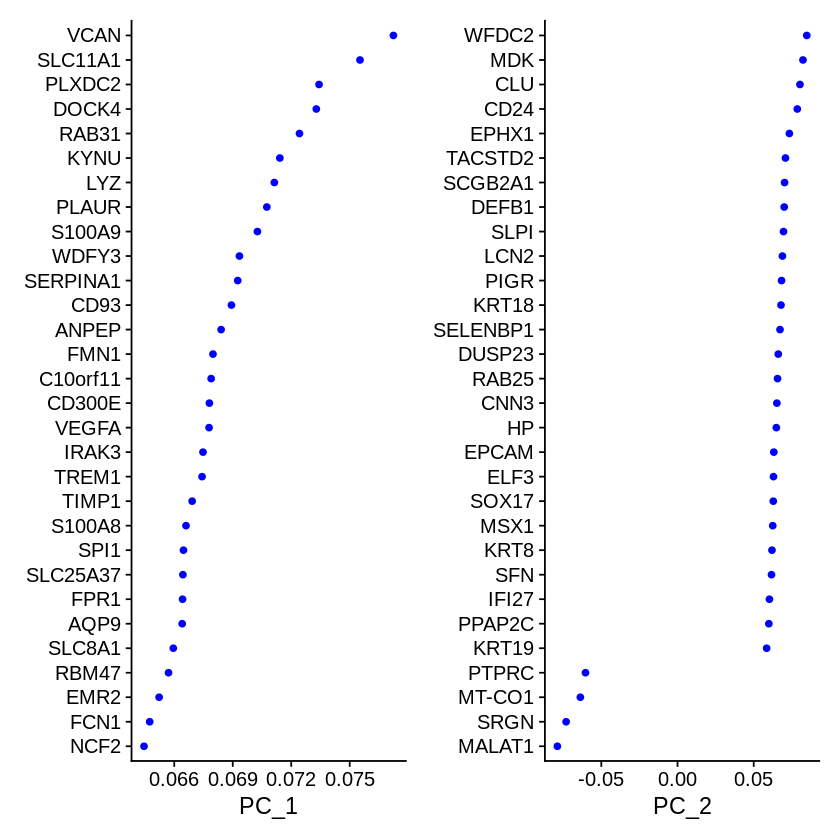

In [116]:
VizDimLoadings(pbmc2, dims = 1:2, reduction = "pca")

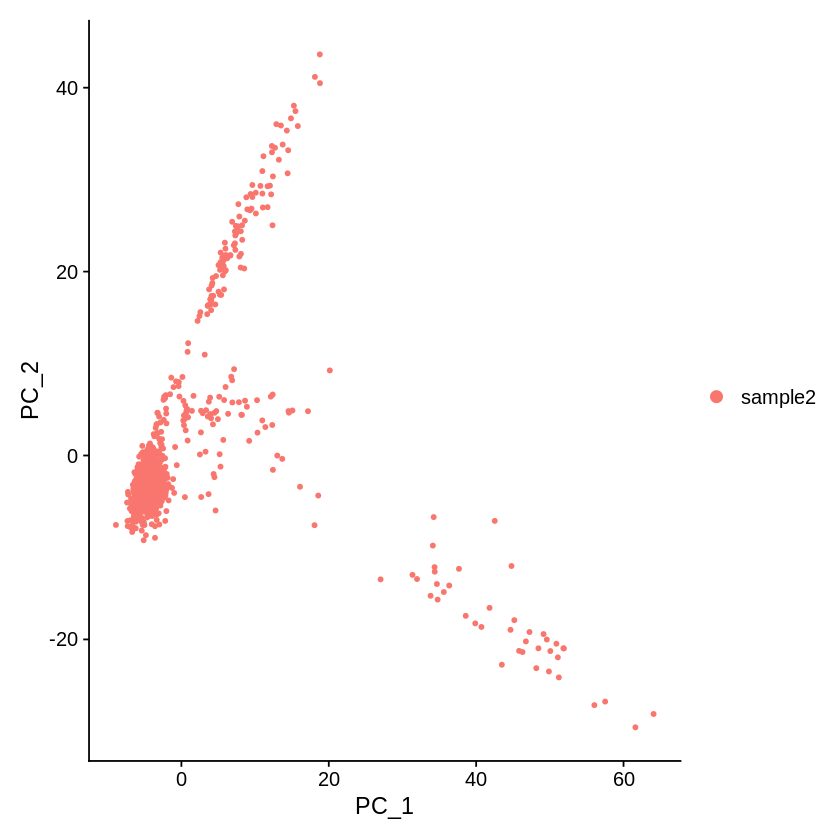

In [118]:
DimPlot(pbmc2, reduction = "pca")

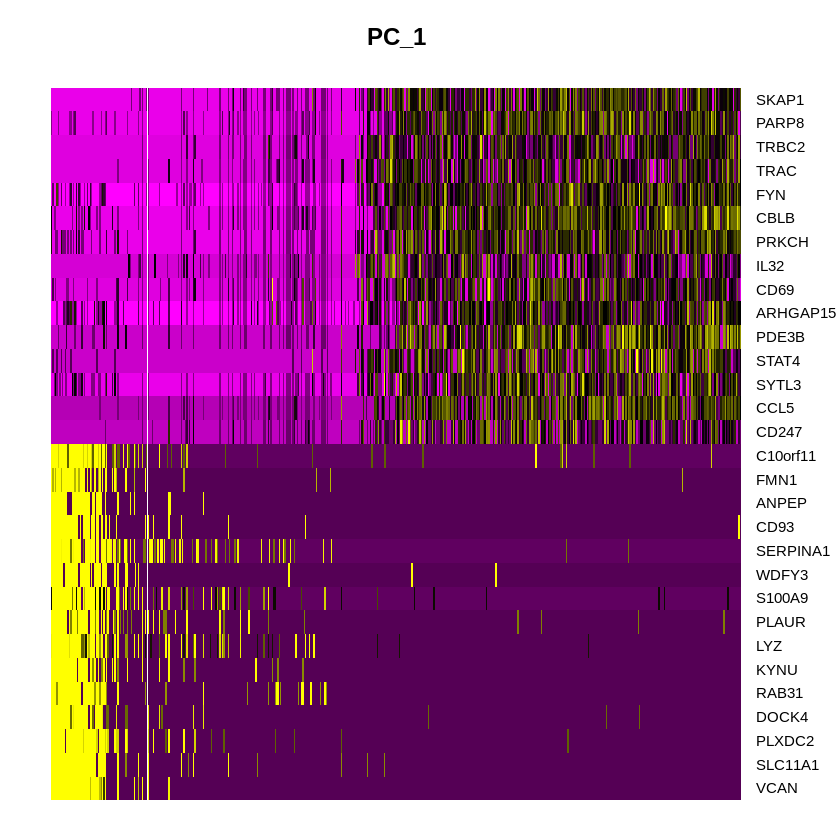

In [119]:
DimHeatmap(pbmc2, dims = 1, cells = 500, balanced = TRUE)

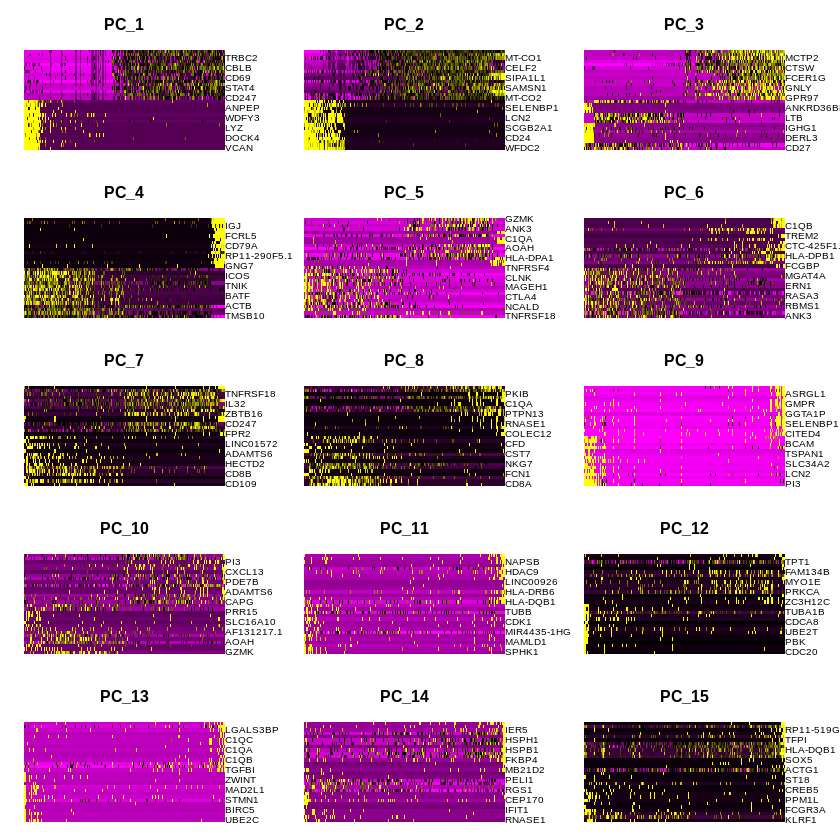

In [120]:
DimHeatmap(pbmc2, dims = 1:15, cells = 500, balanced = TRUE)

## Cluster the Cells

In [121]:
pbmc2 <- FindNeighbors(pbmc2, dims = 1:10)
pbmc2 <- FindClusters(pbmc2, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 912
Number of edges: 24245

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9039
Number of communities: 10
Elapsed time: 0 seconds


In [122]:
# Look at cluster IDs of the first 5 cells
head(Idents(pbmc2), 5)

AAACCCAAGGCACCAA-1 AAACCCAGTAGTACGG-1 AAACGAAGTAGCGAGT-1 AAAGGATGTCGCACGT-1 
                 3                  4                  3                  1 
AAAGTCCAGTGCACCC-1 
                 7 
Levels: 0 1 2 3 4 5 6 7 8 9

## Determine the 'dimensionality' of the dataset

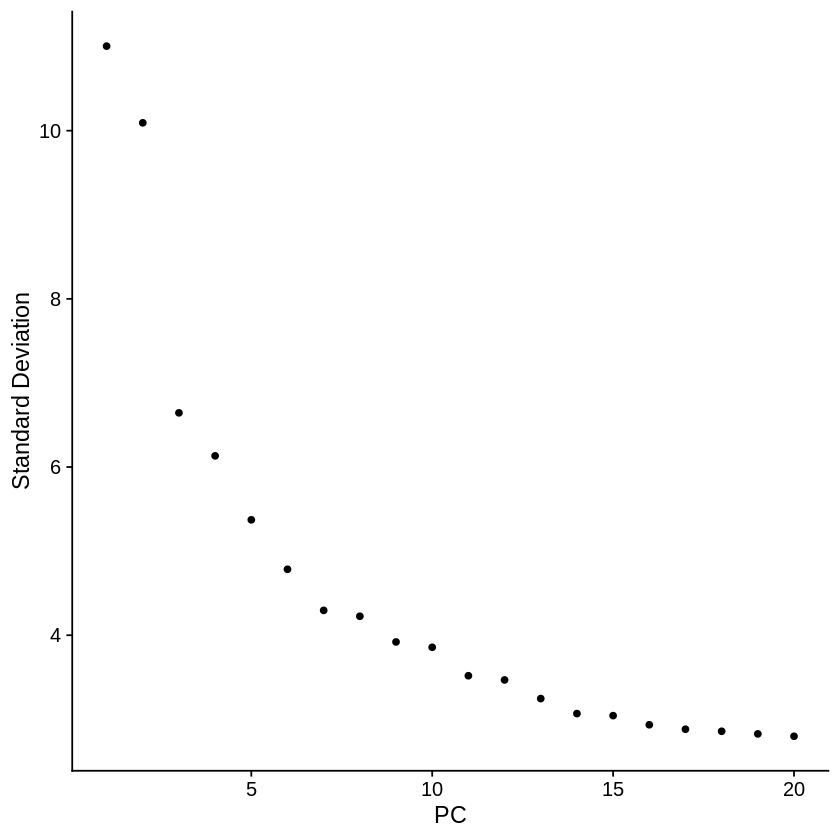

In [123]:
ElbowPlot(pbmc2)

## Run non-linear dimensional reduction (UMAP/tSNE)

In [124]:
pbmc2 <- RunUMAP(pbmc2, dims = 1:10)

22:56:39 UMAP embedding parameters a = 0.9922 b = 1.112

22:56:39 Read 912 rows and found 10 numeric columns

22:56:39 Using Annoy for neighbor search, n_neighbors = 30

22:56:39 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:56:39 Writing NN index file to temp file /tmp/Rtmpl1Xvph/file3d34de2990

22:56:39 Searching Annoy index using 1 thread, search_k = 3000

22:56:40 Annoy recall = 100%

22:56:40 Commencing smooth kNN distance calibration using 1 thread

22:56:41 Initializing from normalized Laplacian + noise

22:56:41 Commencing optimization for 500 epochs, with 33582 positive edges

22:56:42 Optimization finished



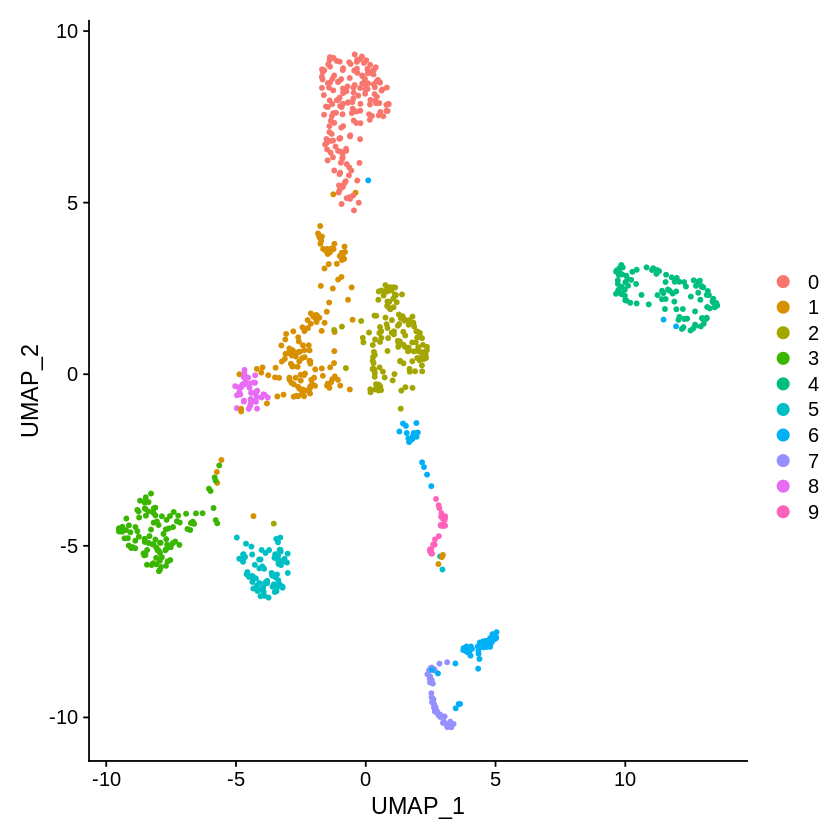

In [125]:
DimPlot(pbmc2, reduction = "umap")

## Finding Differentially Expressed Features (Cluster Biomarkers)

In [126]:
# find all markers of cluster 1
cluster1.markers <- FindMarkers(pbmc2, ident.1 = 2, min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GZMK,2.862559e-121,2.383324,0.924,0.069,4.259773e-117
DTHD1,7.613949e-70,1.080784,0.606,0.047,1.133032e-65
GZMH,6.198755e-47,1.351584,0.636,0.121,9.224367e-43
TC2N,3.343671e-43,1.329553,0.758,0.209,4.975717e-39
CD8B,3.198370e-42,1.190166,0.576,0.105,4.759494e-38


In [127]:
# find all markers distinguishing cluster 1 from clusters 0 and 4
cluster1.markers <- FindMarkers(pbmc2, ident.1 = 1, ident.2 = c(0, 4), min.pct = 0.25)
head(cluster1.markers, n = 5)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CD3D,2.425965e-63,1.687672,0.876,0.054,3.610078e-59
IL7R,1.015077e-56,2.618720,0.800,0.047,1.510536e-52
BCL11B,8.173795e-49,1.300818,0.669,0.018,1.216342e-44
CD3G,1.208183e-42,1.030695,0.600,0.014,1.797897e-38
THEMIS,7.632495e-42,1.808302,0.641,0.047,1.135792e-37


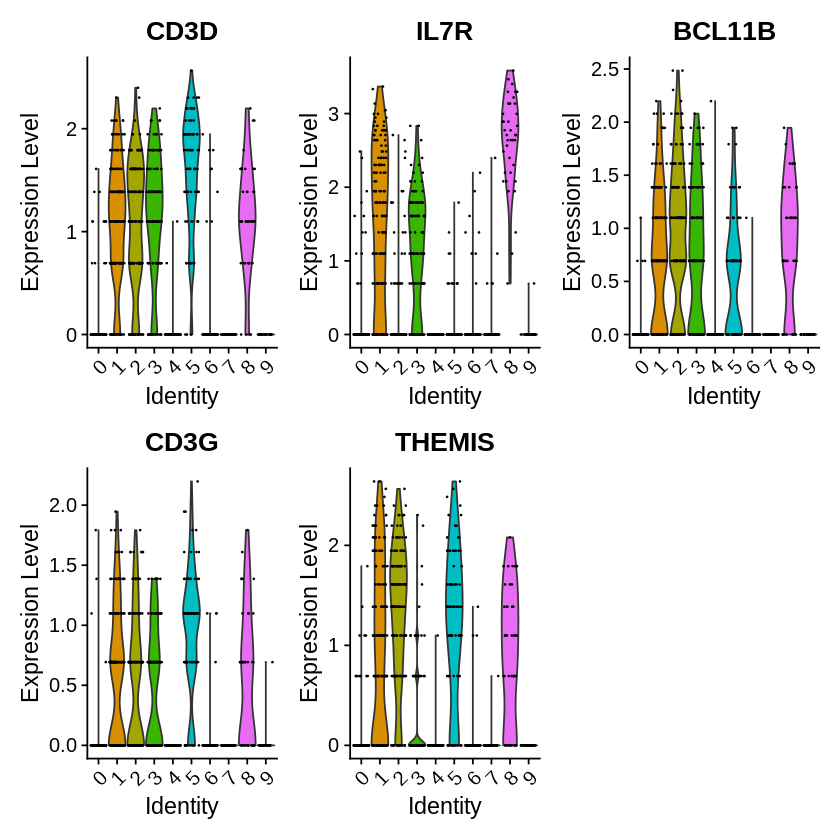

In [128]:
VlnPlot(pbmc2, features = c("CD3D", "IL7R", "BCL11B", "CD3G", "THEMIS"))

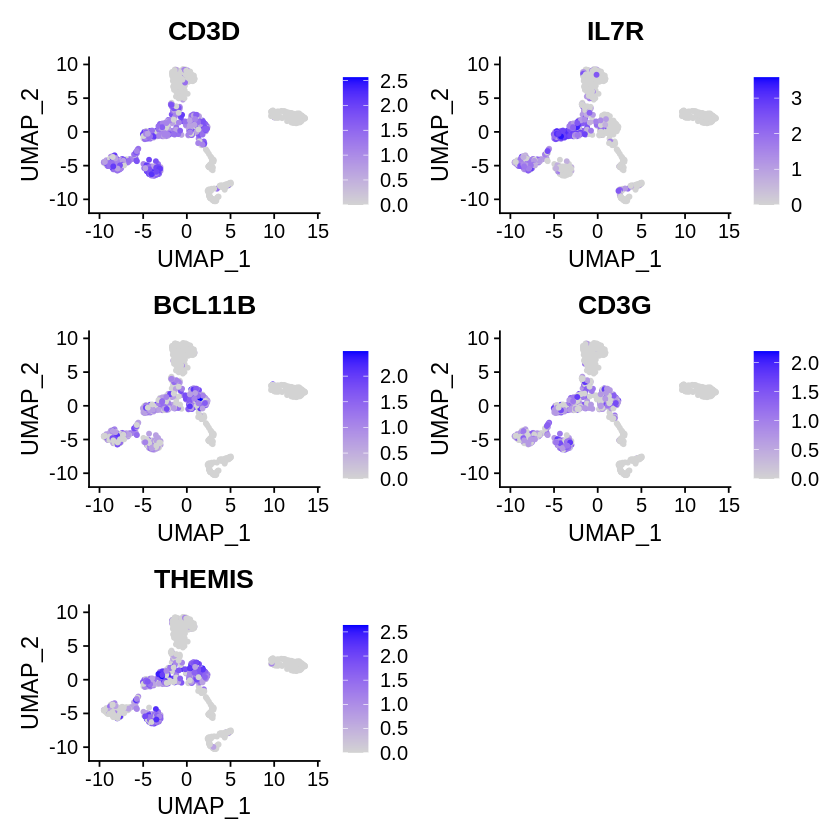

In [129]:
FeaturePlot(pbmc2, features = c("CD3D", "IL7R", "BCL11B", "CD3G", "THEMIS"))